In [14]:
import pandas as pd
import numpy as np

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold

#classifiers
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, StackingClassifier

#Prformance metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

from statistics import mean

#Explainable AI
import shap

In [2]:
from sklearn.exceptions import ConvergenceWarning
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

simplefilter(action='ignore', category=ConvergenceWarning)

simplefilter(action='ignore', category=UserWarning)

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize']=15,10

In [5]:
icl = pd.read_excel('iclML.xlsx')

In [6]:
icl_c = icl.drop([9, 25])
icl_c = icl_c.drop(['SampleID'], axis=1)
percent_missing = icl_c.isnull().sum() * 100 / len(icl_c)
missing_value_df = pd.DataFrame({'column_name': icl_c.columns,
                                 'percent_missing': percent_missing})
missing_value_df.loc[missing_value_df['percent_missing']> 0.000] 

,column_name,percent_missing


In [7]:
from sklearn.preprocessing import StandardScaler

col = icl_c.drop(['WHO max', 'KIDNEY', 'Age cat'], axis=1).columns

sc = StandardScaler()

for i in col:
    icl_c[[i]] = sc.fit_transform(icl_c[[i]])


In [ ]:
icl_c

,4E-BP1,ACE2,ADA,ADAM-TS13,ADM,AGRP,ALCAM,AMBP,ANG,ANGPT1,...,VEGFD,VSIG2,ZBTB16,hOSCAR,t-PA,uPA,vWF,Age cat,KIDNEY,WHO max
0,0.381875,-0.645933,-0.060754,0.839286,0.029612,0.655664,0.288078,-0.003218,-1.335346,0.742154,...,0.822578,0.733012,0.258535,1.023419,-0.321063,0.936878,-1.091724,3,1,0
1,0.292171,0.795940,0.339731,0.475248,-0.268376,0.403859,-0.653618,0.115901,-2.833924,1.983073,...,-0.371323,0.069903,-0.035372,1.007217,-0.779798,0.254814,2.179355,4,1,0
2,0.312382,-0.032561,2.072869,0.886719,-0.149558,0.543861,0.953811,-0.732935,0.984718,-0.300350,...,-0.125162,0.151602,0.170564,0.953188,0.294307,-0.772202,1.302982,3,1,0
3,-0.348646,-0.242439,-0.662374,-0.336535,-0.054278,1.323464,0.607599,-0.466430,-0.657311,-1.819837,...,-0.091927,-1.179296,-1.106048,0.932726,-0.247595,1.047003,-0.877223,3,1,0
4,-1.444886,-0.108125,-0.189548,-0.699103,0.535593,-1.148077,-0.013669,-0.458704,1.957105,-0.074681,...,0.048562,-0.373657,0.051942,0.122689,0.454579,-0.619375,-0.613690,3,1,0
5,-0.678834,-0.792648,-1.145976,-0.311877,1.222947,1.323453,-0.324271,-1.478685,-1.485175,-1.814264,...,1.216090,-0.098512,-1.740317,1.353786,0.924777,0.663219,-0.556373,4,1,1
6,-0.293555,0.112477,-1.392455,-0.749154,-0.663532,-0.054681,-2.582123,-0.646332,-0.002705,-0.944178,...,-2.460902,0.816634,-0.960230,-0.407976,0.708074,-0.179561,0.636398,3,1,0
7,0.963512,-0.502382,0.518212,1.657314,1.504131,0.870948,0.069422,0.886633,-0.167853,-1.073676,...,1.051205,-0.753746,0.423272,-0.379316,0.244377,-0.634809,1.470093,3,1,0
8,-0.300875,0.492133,0.206693,-0.489947,0.336662,-1.258337,0.282176,-0.695525,0.690196,-0.964800,...,-0.119270,0.166735,-0.248375,-1.328007,0.817894,0.721112,1.478738,4,1,0
10,-2.217310,-0.610373,-1.503574,1.368306,-0.147104,-1.150009,-0.924101,0.240944,0.098291,-0.473612,...,-0.695093,0.644232,-0.862653,-1.450845,-1.035230,-1.859168,-0.225840,3,1,0


In [15]:
def Algo_search(models , params):

    max_score = 0
    max_model = None
    max_model_params = None
    estimators_gridsearch = pd.DataFrame()
    models_est = []
    parametres = []
    lscore = []
    lroc = []
    lfscore = []
    lprecision = []
    lrecall = []
    
    scoring = {'accuracy': make_scorer(accuracy_score), 
               'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
               'f1': make_scorer(f1_score), 
               'precision': make_scorer(precision_score), 
               'recall': make_scorer(recall_score),}

    for i,j in zip(models.keys() , models.values() ):

        gs = GridSearchCV(estimator=j,param_grid=params[i], scoring=scoring, refit = "accuracy", )
        a = gs.fit(X_train,y_train)
        score = gs.score(X_test,y_test, )
        mauc = []
        mprecision = []
        mrecall = []
        mfscore = []
        maccuracy = []
        for i in range(5):
          maccuracy.append(mean(gs.cv_results_['split'+str(i)+'_test_accuracy']))
          mauc.append(mean(gs.cv_results_['split'+str(i)+'_test_roc_auc']))
          mfscore.append(mean(gs.cv_results_['split'+str(i)+'_test_f1']))
          mprecision.append(mean(gs.cv_results_['split'+str(i)+'_test_precision']))
          mrecall.append(mean(gs.cv_results_['split'+str(i)+'_test_recall']))
        models_est.append(gs.best_estimator_)
        parametres.append(gs.best_params_)
        lscore.append(round(score,2))
        lroc.append(round(mean(mauc),2))
        lfscore.append(round(mean(mfscore),2))
        lprecision.append(round(mean(mprecision),2))
        lrecall.append(round(mean(mrecall),2))

        if score > max_score:
            max_score = score
            max_model = gs.best_estimator_
            max_model_params = gs.best_params_

    estimators_gridsearch['Models'] = list(models_est)
    estimators_gridsearch['Best parameters'] = list(parametres)
    estimators_gridsearch['Score'] = list(lscore)
    estimators_gridsearch['AUC'] = list(lroc)
    estimators_gridsearch['F1-score'] = list(lfscore)
    estimators_gridsearch['Precision'] = list(lprecision)
    estimators_gridsearch['Recall'] = list(lrecall)
   

    # print(estimators_gridsearch)

    return [max_score, max_model, max_model_params], estimators_gridsearch

In [16]:
#Data points

models = {'model_gbm':GradientBoostingClassifier(), 'model_rf':RandomForestClassifier(), 
  'model_dt':DecisionTreeClassifier(), 'model_svm':SVC(), 'model_ada':AdaBoostClassifier(), 'model_knn': KNeighborsClassifier(), 
  'model_xgb': xgb.XGBClassifier(),'model_ext': ExtraTreesClassifier(), 'model_mlp': MLPClassifier()}
params_gbm = {'learning_rate':[0.1,0.2,0.3,0.4], 'n_estimators':[50,100,500,1000,2000]}
params_rf = {'n_estimators':[50,100,500,1000,2000], 'max_depth' : [5, 10, 20], 'class_weight' : [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]}
params_dt = {'splitter':['best','random'], 'max_depth':[1, 5, 10, 50, 100]}
params_svm = {'C':[1,2,5,10,50,100,500], 'kernel':['rbf','poly','sigmoid','linear']}
params_ada = {'n_estimators':[10,20,30,50,100,500,1000], 'learning_rate':[0.5,1,2,5,10]}
params_knn = {'n_neighbors' : [2,5,10,25,50]}
params_ext = {'n_estimators':[50,100,500,1000,2000], 'max_depth' : [5, 10, 20], 'class_weight' : [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]}
model_mlp = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 
             'learning_rate':['constant','adaptive'], 'alpha': [0.0001, 0.05],
             'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)]}
params_xgb = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
params = {'model_gbm':params_gbm, 'model_rf':params_rf, 'model_dt':params_dt, 'model_svm':params_svm, 'model_ada':params_ada, 'model_knn': params_knn, 
          'model_ext':params_ext, 'model_mlp': model_mlp, 'model_xgb':params_xgb}

In [8]:
X = icl_c.drop(['WHO max'], axis=1)
y = icl_c['WHO max']

# PCA preprocessing

In [9]:
pca = PCA(.90)
 
X = pca.fit_transform(X[col])
X = pd.DataFrame(X)
X['KIDNEY'] = list(icl_c['KIDNEY'])
X['Age cat'] = list(icl_c['Age cat'])

In [10]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, index=icl_c.drop(['WHO max'], axis=1)[col].columns)
loading_matrix

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
4E-BP1,-0.780438,0.178617,-0.191340,-0.151954,-0.128477,-0.030296,-0.118850,0.123461,-0.092490,-0.150548,...,-0.109742,0.022232,0.155951,0.046975,0.067913,-0.075861,0.048333,-0.066021,-0.023177,-0.033966
ACE2,-0.509345,-0.315649,0.294124,0.080299,-0.073142,0.188225,0.208736,-0.023016,0.388086,-0.039427,...,0.061058,0.042374,0.092394,-0.120604,0.014720,0.085598,-0.102554,-0.021888,-0.018974,0.159027
ADA,-0.652352,0.246538,0.002609,-0.079453,0.126092,0.023618,0.010684,0.069810,0.153464,-0.073037,...,0.077391,0.082877,-0.050466,-0.150131,0.124363,-0.015881,0.006955,-0.065308,0.046551,-0.060993
ADAM-TS13,0.124391,0.198143,-0.470571,0.065712,0.316049,0.172711,0.023749,0.191565,0.106482,0.270576,...,-0.041875,-0.051035,-0.177505,0.058311,-0.011371,0.169323,-0.042893,0.081271,-0.079344,-0.010848
ADM,-0.053995,0.015503,-0.107521,-0.264200,0.331549,0.289455,-0.095418,0.092883,-0.073617,0.007778,...,0.137151,-0.156868,0.045984,0.126075,0.177564,0.008734,-0.032071,0.029895,0.028017,-0.019869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB16,-0.694533,0.550737,0.174601,0.023835,0.151408,0.115878,0.099203,-0.059863,0.045244,-0.135793,...,-0.088847,-0.041804,-0.095473,-0.050393,0.071896,0.003243,-0.038603,-0.079847,-0.063256,-0.000025
hOSCAR,-0.346326,-0.432768,-0.186519,0.083247,0.242466,0.011063,-0.243460,-0.156593,-0.278471,0.102336,...,-0.090213,0.147001,-0.151732,0.112687,0.060569,0.080572,0.280286,-0.050401,-0.010828,-0.113091
t-PA,-0.435517,-0.245377,0.083688,0.031737,-0.029196,-0.339670,0.368646,-0.048333,-0.163935,-0.069978,...,0.011548,-0.062540,-0.131776,-0.147864,0.118402,0.023933,-0.000026,-0.023476,-0.138776,0.002479
uPA,-0.492135,-0.477873,-0.110108,-0.096713,0.262799,-0.412982,0.099117,-0.000239,-0.013618,0.138629,...,0.039576,-0.109578,0.037573,-0.069772,-0.084765,0.129924,-0.031920,0.085258,0.003211,0.002239


In [11]:
load_trans = loading_matrix.T
magnitude = 0
loading_pow = {}
for i in load_trans.columns:
    magnitude = load_trans[i].pow(2).sum()
    loading_pow[i] = magnitude

pd.DataFrame.from_dict(loading_pow, orient='index').to_excel('loadingspowICL.xlsx')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
grid_mX_pca, grid_ml_pca = Algo_search(models = models, params = params)

grid_ml_pca

# Explainable AI

In [31]:
clf = MLPClassifier(activation= 'logistic',
hidden_layer_sizes= (50, 50, 50),
alpha= 0.0001,
learning_rate= 'constant',
solver= 'adam'
)

clf.fit(X, y)

explainer = shap.KernelExplainer(clf.predict,X)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/11 [00:00<?, ?it/s]

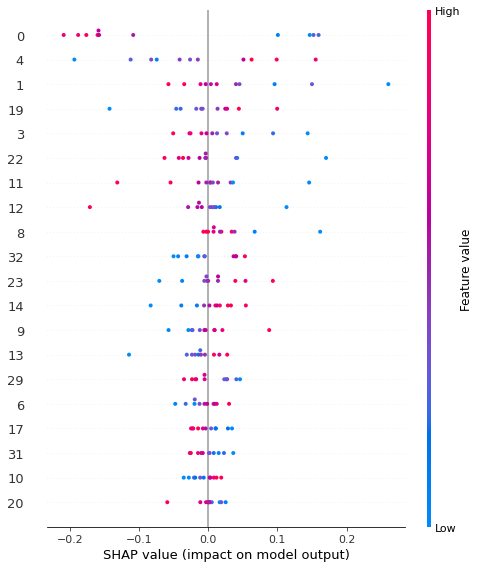

In [49]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values,X_test,feature_names=X.columns, max_display =20,show=False )
plt.savefig('mlp_xai_icl.svg')

In [35]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.to_excel('icl_mlp_xai.xlsx')

In [48]:
load_trans = loading_matrix[list(feature_importance['col_name'])[:21]].T
magnitude = 0
loading_pow = {}
for i in load_trans.columns:
  magnitude = load_trans[i].pow(2).sum()
  loading_pow[i] = magnitude

pd.DataFrame.from_dict(loading_pow, orient='index').to_excel('loadingspowICLmpl.xlsx')